<a href="https://colab.research.google.com/github/uliang/MS9002-Data-mining-techniques/blob/master/Illustration_of_OLS_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
from scipy.stats import norm

In [0]:
normal_dist = norm(scale=0.5)
x = np.linspace(-1, 3, 20) 
y = -1.3 + 2*x + normal_dist.rvs(size=20)


In [0]:
#@title Choose intercept and gradient {display-mode: "form"}
intercept = -0.9 #@param {type:"slider", min:-2, max:3, step:0.02}
gradient = 1.15 #@param {type: "slider", min: -0.5, max:10, step: 0.05}
show_OLS_estimate = True #@param {type:"boolean"}
show_residual_bars = True #@param {type:"boolean"}


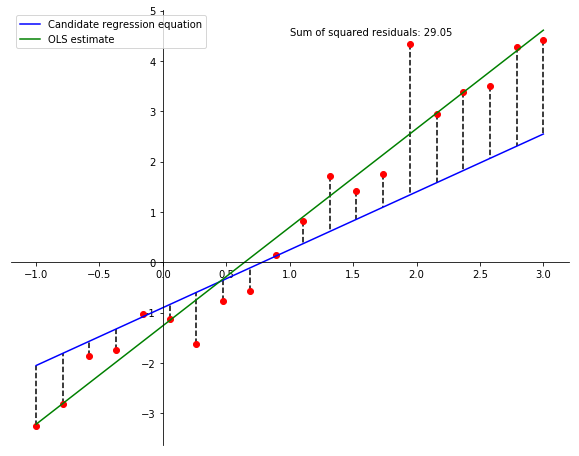

In [24]:
%matplotlib inline 

import matplotlib.pyplot as plt

# Figure declarations
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Computing points to visualize candidate equation and Sum of Squares Residuals
xx = np.linspace(-1, 3, 100)
y_model = intercept + gradient * xx

ssr = np.sum(np.power(y - (intercept + gradient * x), 2))

# Compute OLS estimate Let X = design matrix, then beta = (X^T*X)^-1*X^T*y

X = np.c_[np.ones_like(x), x]
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)
a, b = beta
y_ols = a + b * xx

# Plot objects 
ax.plot(x,y, 'ro')
ax.plot(xx, y_model, 'b-', label='Candidate regression equation')
ax.text(1., 4.5, f'Sum of squared residuals: {ssr:.2f}')
if show_OLS_estimate: 
  ax.plot(xx, y_ols, 'g-', label="OLS estimate")

# Display residual bars
y_fit = intercept + gradient * x
if show_residual_bars: 
  ax.vlines(x, y, y_fit, colors='k', linestyles='dashed')

ax.legend(loc='best')